## importing dependencies

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

IMPORTING DATA 

In [186]:
path = './HousingData.csv'
dataset = pd.read_csv(path)
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


The data contains the following columns:

    'crim': per capita crime rate by town.
    'zn': proportion of residential land zoned for lots over 25,000 sq.ft.
    'indus': proportion of non-retail business acres per town.
    'chas':Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
    'nox': nitrogen oxides concentration (parts per 10 million).
    'rm': average number of rooms per dwelling.
    'age': proportion of owner-occupied units built prior to 1940.
    'dis': weighted mean of distances to five Boston employment centres.
    'rad': index of accessibility to radial highways.
    'tax': full-value property-tax rate per $10,000.
    'ptratio': pupil-teacher ratio by town
    'black': 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
    'lstat': lower status of the population (percent).
    'medv': median value of owner-occupied homes in $$1000s


In [187]:
dataset.shape

(506, 14)

In [188]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [189]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [190]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [191]:
dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

### cleaning the data

we found the data having missing values.

soo I deleted the the rows containing the NaN values...

In [192]:
dataset.dropna(subset=["CRIM", "ZN", "INDUS", "CHAS", "AGE", "LSTAT"],axis=0,inplace=True)

In [193]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [194]:
dataset.shape

(394, 14)

In [195]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# EDA

In [196]:
corr = dataset.corr()

<Axes: >

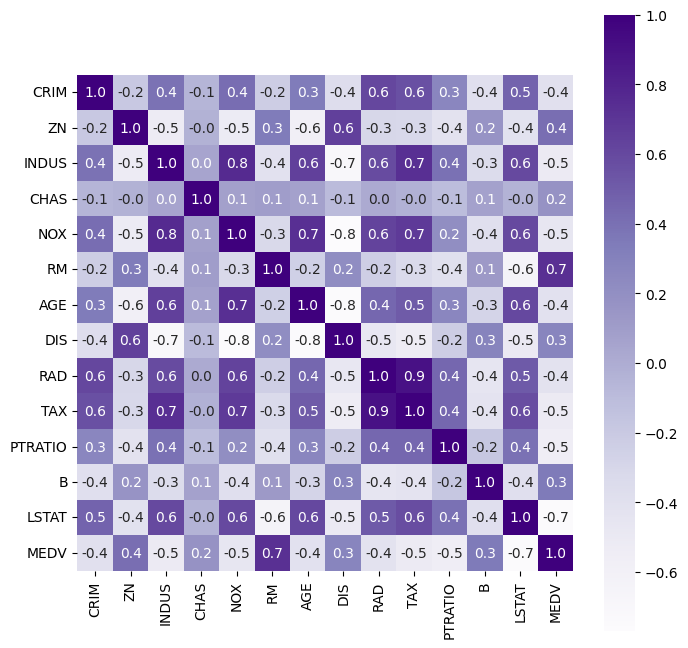

In [197]:
# plotting the heatmap of correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10},cmap='Purples')

In this above heatmap we can see that MEDV is directly proportional to RM. soo it may show a liner graph

<Axes: xlabel='RM', ylabel='MEDV'>

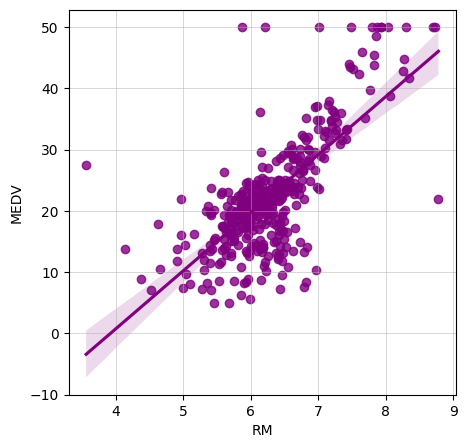

In [198]:
plt.figure(figsize=(5, 5))
plt.grid(visible=True, linestyle='-', linewidth=0.5, alpha=0.7)
sns.regplot(x=dataset['RM'], y=dataset['MEDV'], color='purple')

negative correlations

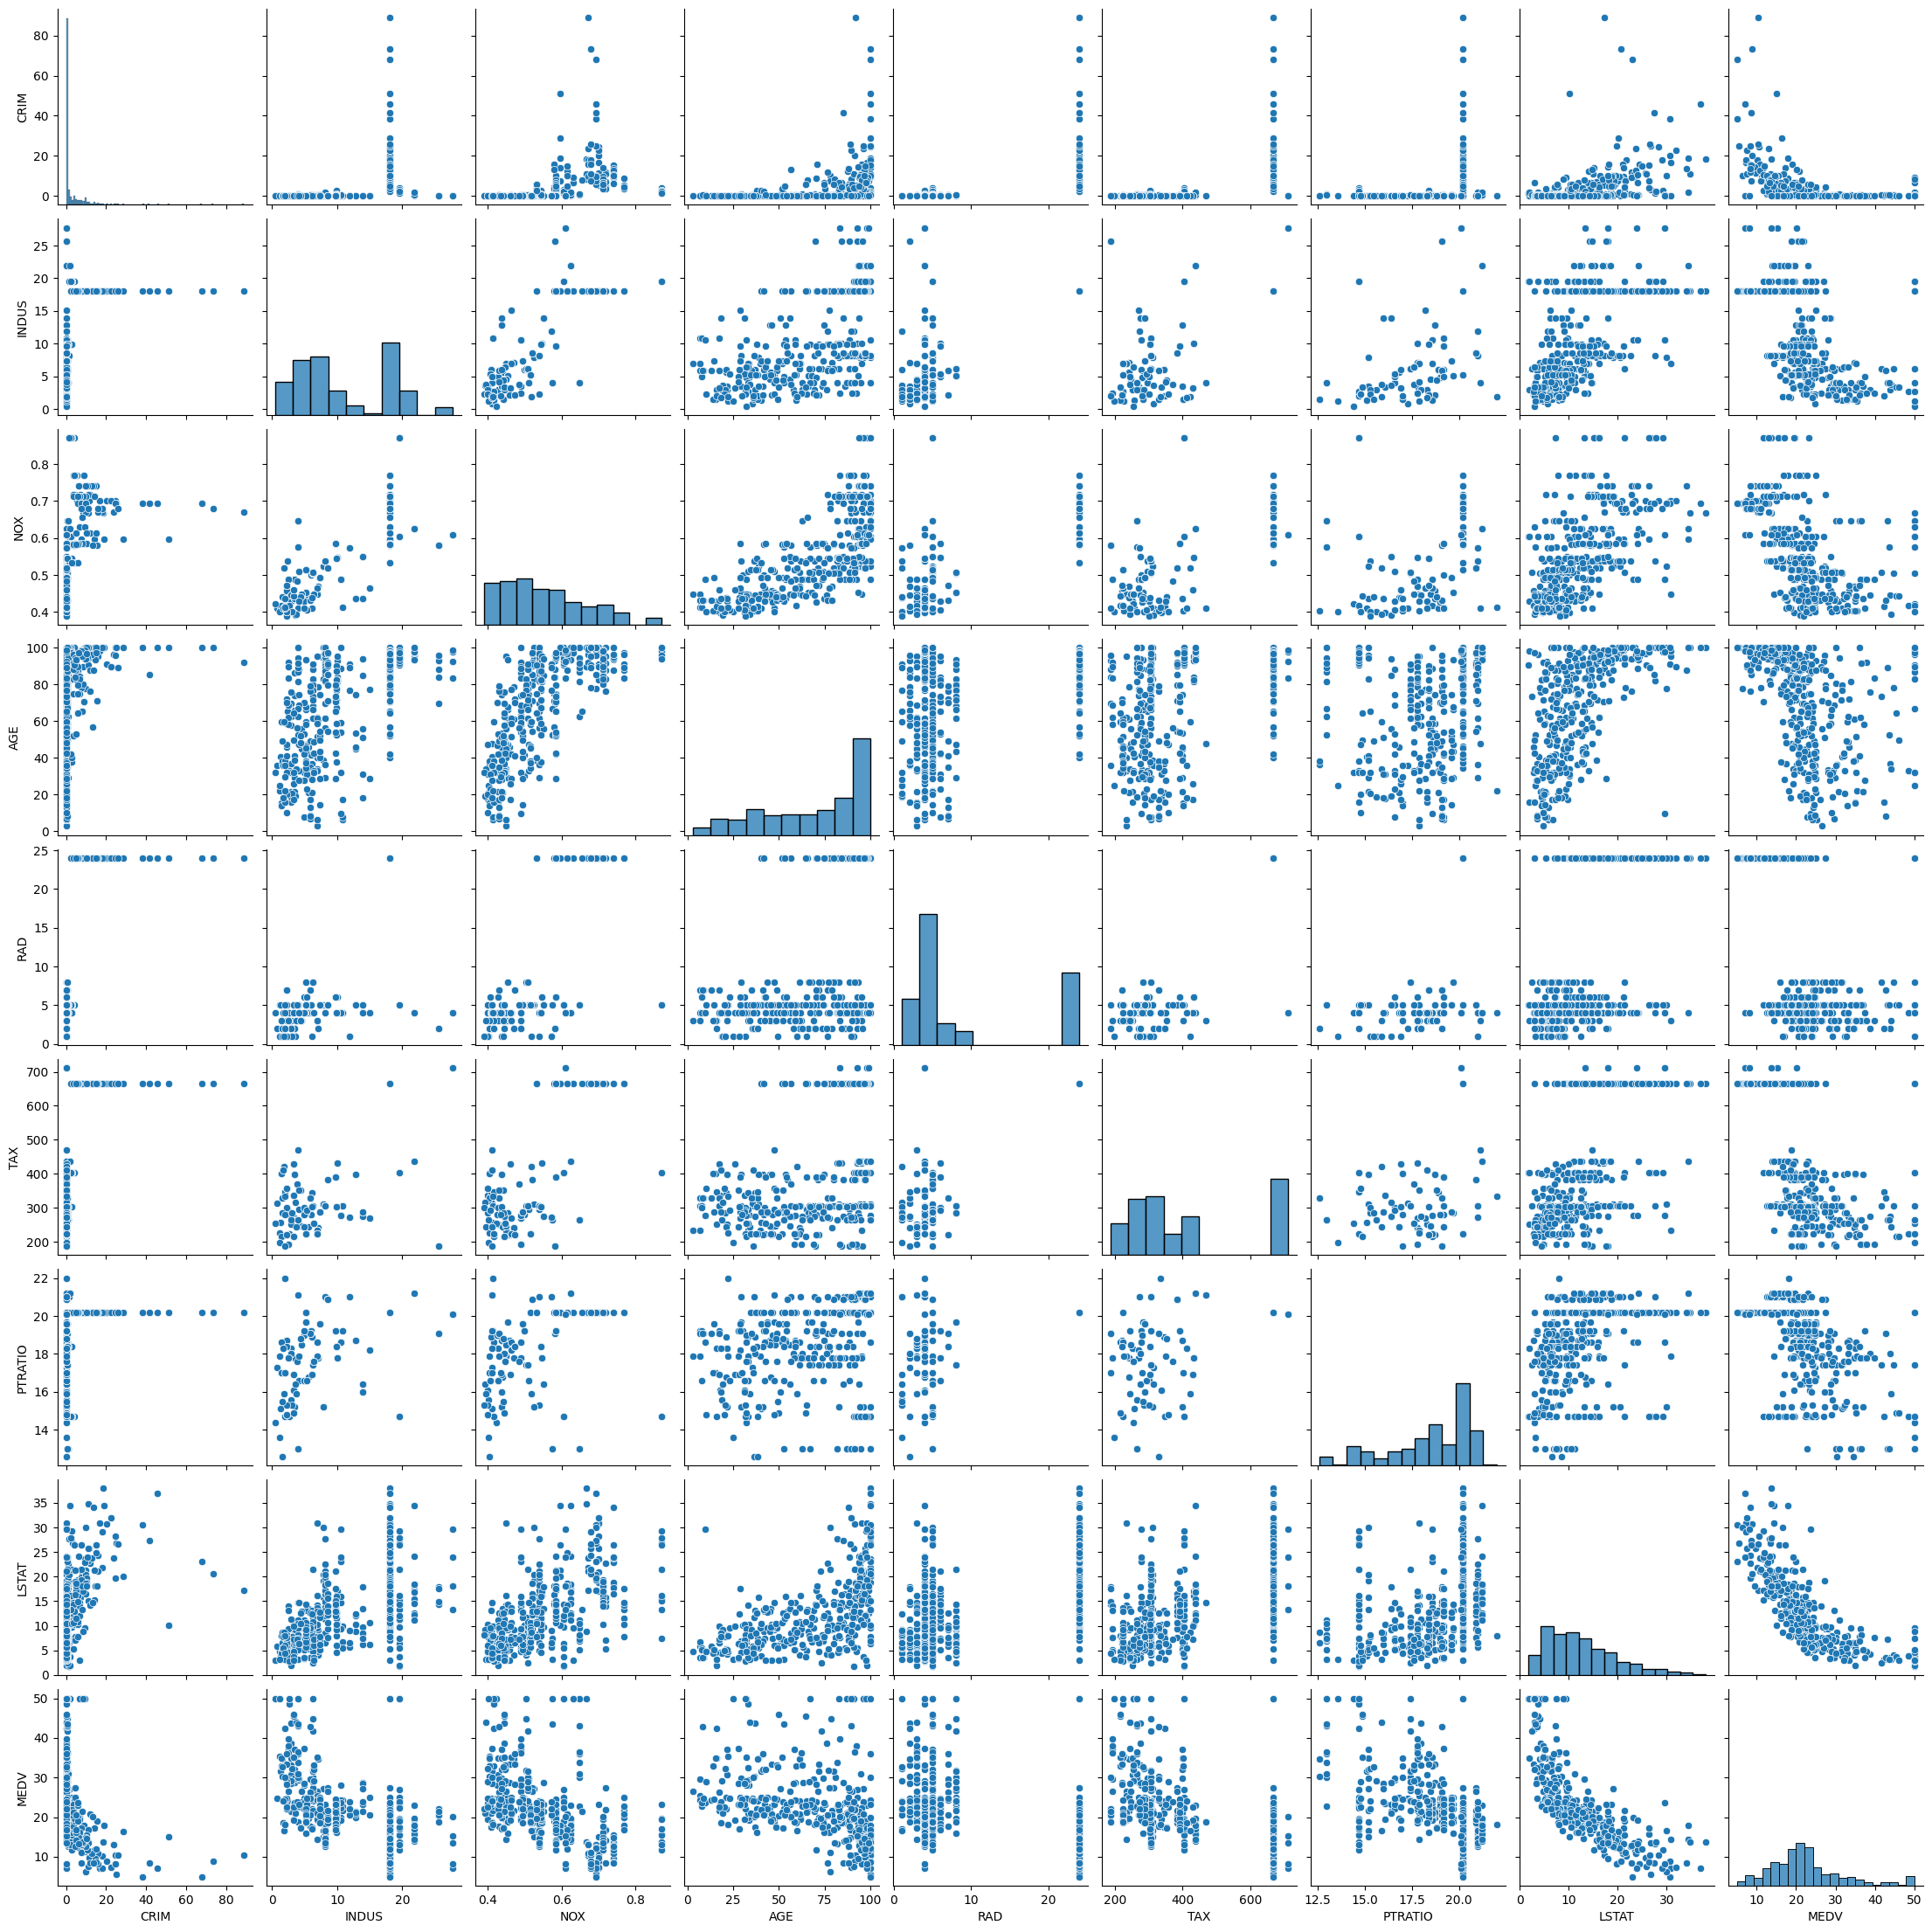

In [199]:
# pairplotting the negative correlation
sns.pairplot(dataset, vars=['CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'])

positive correlations

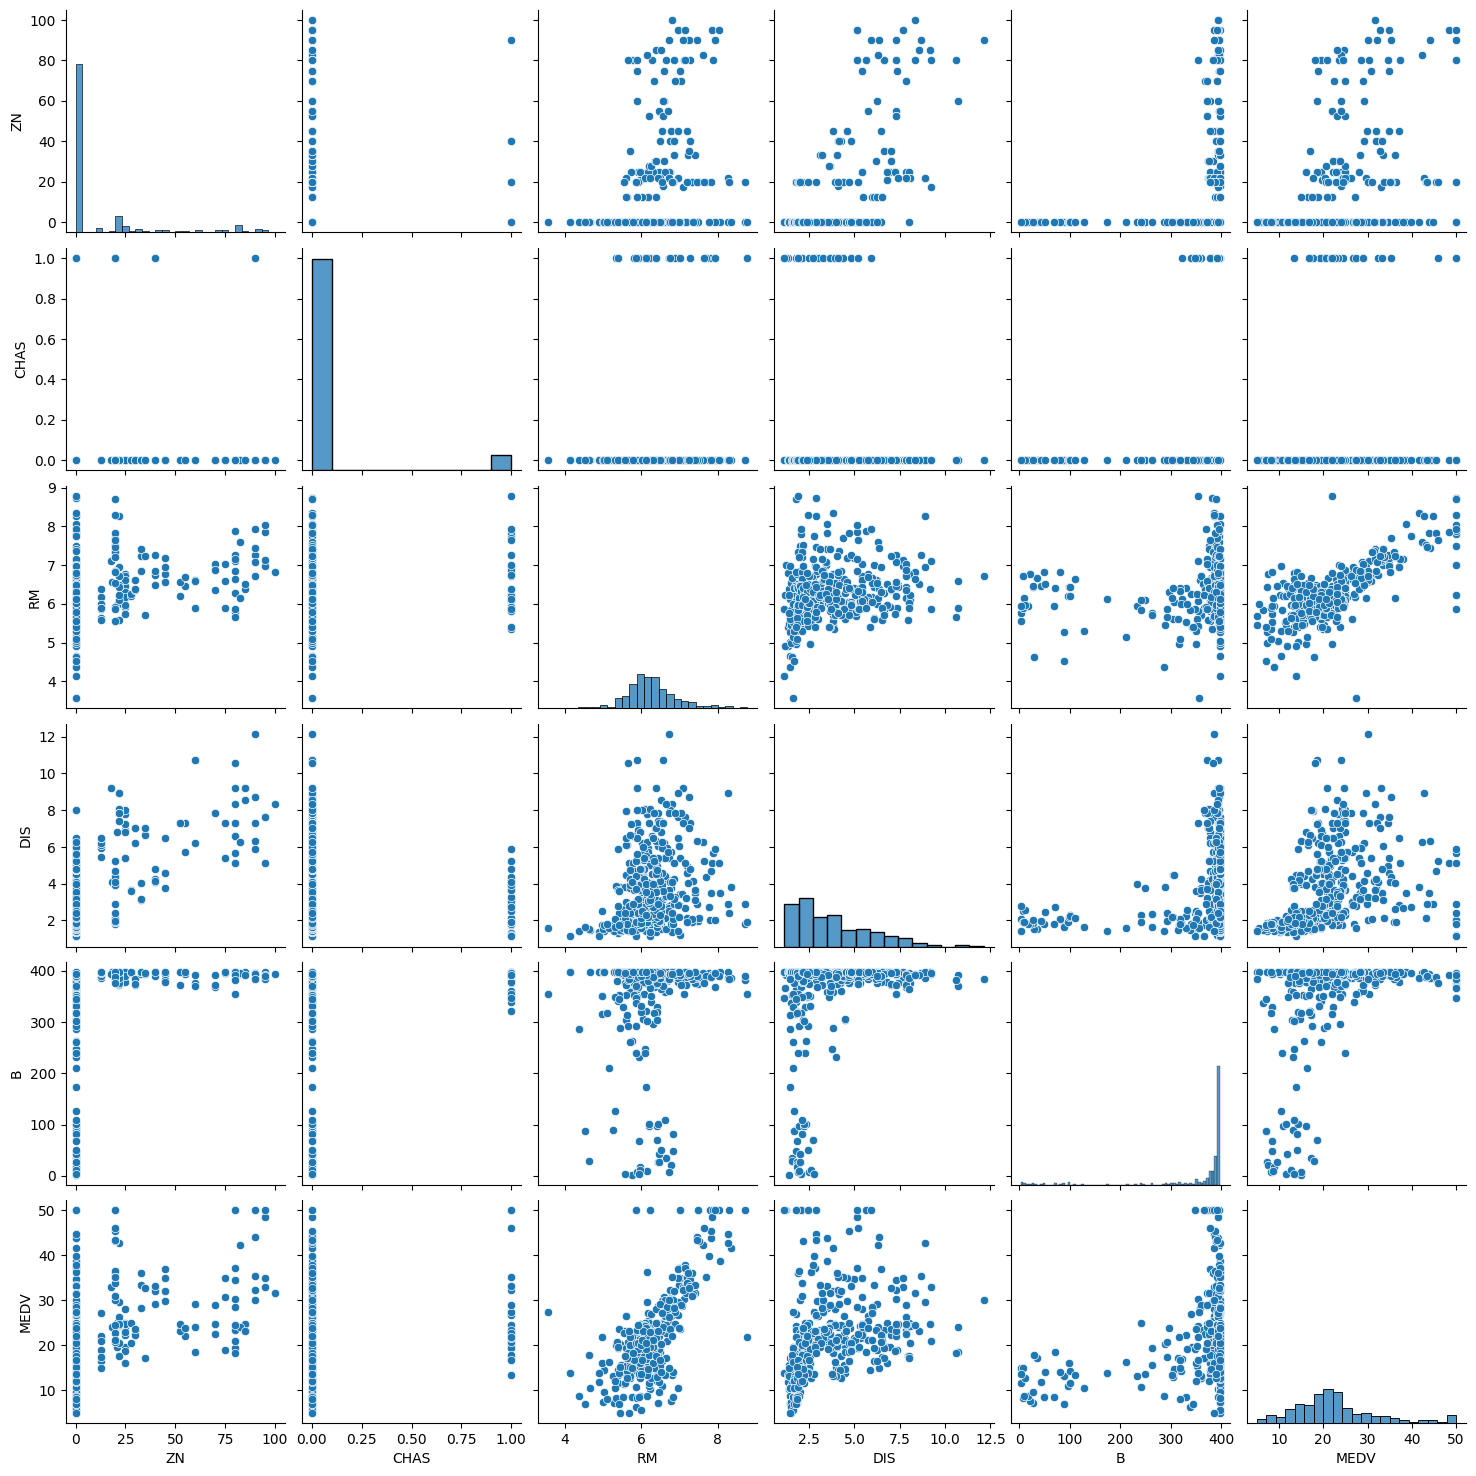

In [200]:
# pairplotting the positive correlation
sns.pairplot(dataset, vars=['ZN', 'CHAS', 'RM', 'DIS', 'B', 'MEDV'])

now let's select features and target

In [201]:
# Features and target
X = dataset.drop("MEDV", axis=1)
y = dataset["MEDV"]

# Model

#### Train Test Split

In [202]:
train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=10, test_size=0.2)

In [203]:
print(f"complete data shape: {dataset.shape}")
print(f"Orignal X shape: {X.shape}")
print(f"Orignal y shape: {y.shape}")
print(f"Train X shape: {train_X.shape}")
print(f"Test X shape: {test_X.shape}")
print(f"Train y shape: {train_y.shape}")
print(f"Test y shape: {test_y.shape}")

complete data shape: (394, 14)
Orignal X shape: (394, 13)
Orignal y shape: (394,)
Train X shape: (315, 13)
Test X shape: (79, 13)
Train y shape: (315,)
Test y shape: (79,)


## Standerdizing the feature

In [204]:
scalar = StandardScaler()
train_X_scaled = scalar.fit_transform(train_X)
test_X_scaled = scalar.transform(test_X)


#### model selection and fitting data

In [205]:
reg_model = LinearRegression().fit(train_X_scaled, train_y)

model evaluation

In [206]:
predicted_y = reg_model.predict(test_X_scaled)

# Mean Squared Error
mse = mean_squared_error(predicted_y,test_y)
# Mean Absolute Error
mae = mean_absolute_error(predicted_y,test_y)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 14.550366852593088
Mean Absolute Error: 3.13620456469589


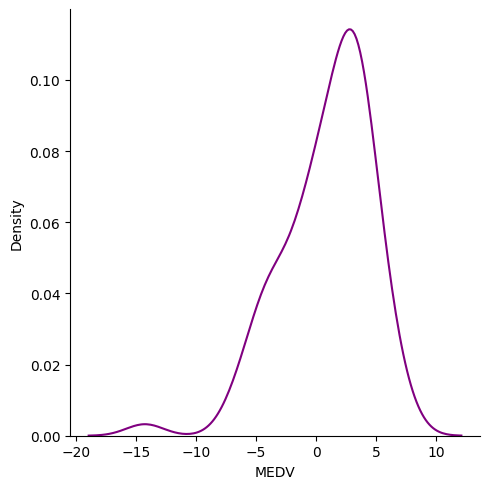

In [207]:
sns.displot((predicted_y-test_y), kind='kde', color='purple')

# Predictive model

In [208]:
input_data = (0.0412, 40, 5.78, 0, 0.5, 6.45, 12.0, 4.55, 4, 300, 17.5, 420.1, 3.5)
# changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#scaling the input data
scaling_input_data = scalar.transform(input_data_reshaped)

In [209]:
prediction = reg_model.predict(scaling_input_data)
print(f"Predicted price is: {round((prediction[0] * 1000), 2)} $")

Predicted price is: 30950.27 $
